In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna
import joblib
import warnings
warnings.filterwarnings('ignore')



In [5]:
# Load the feature-selected data
X_train = pd.read_csv('../data/processed/X_train_selected.csv')
X_test = pd.read_csv('../data/processed/X_test_selected.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

# Flatten y_train and y_test to be 1D arrays for scikit-learn
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()



In [6]:
# Split the original training data into a new training set and a validation set
# We'll call them _final to avoid confusion
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Original training data shape:", X_train.shape)
print("New final training data shape:", X_train_final.shape)
print("Validation data shape:", X_val.shape)

Original training data shape: (1007, 30)
New final training data shape: (805, 30)
Validation data shape: (202, 30)


In [7]:
# Initialize and train the Logistic Regression model on the new, smaller training set
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_final, y_train_final)

# Make predictions on the VALIDATION set to check performance
y_pred_val_lr = lr_model.predict(X_val)

# Evaluate the model on the VALIDATION set
print("Classification Report for Logistic Regression (on Validation Set):\n")
print(classification_report(y_val, y_pred_val_lr))

Classification Report for Logistic Regression (on Validation Set):

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       100
           1       0.76      0.75      0.76       102

    accuracy                           0.76       202
   macro avg       0.76      0.76      0.76       202
weighted avg       0.76      0.76      0.76       202



Classification Report for Random Forest (on Validation Set):

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       100
           1       0.76      0.73      0.74       102

    accuracy                           0.75       202
   macro avg       0.75      0.75      0.75       202
weighted avg       0.75      0.75      0.75       202



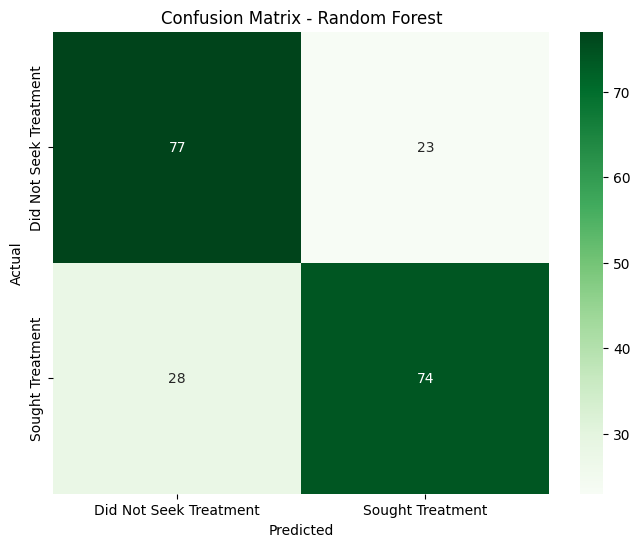

In [8]:
# An Accuracy of 76% is solid for an initial model on this dataset!
# We will train more powerful and complex mode: Random Forest Classifier next.


# Initialize and train the Random Forest Classifier
# n_estimators=100 means it will build 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train_final)

# Make predictions on the validation set
y_pred_val_rf = rf_model.predict(X_val)

# Evaluate the model on the validation set
print("Classification Report for Random Forest (on Validation Set):\n")
print(classification_report(y_val, y_pred_val_rf))

# Generate and plot the confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_val_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Seek Treatment', 'Sought Treatment'],
            yticklabels=['Did Not Seek Treatment', 'Sought Treatment'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


e:\DATA ANALYST BY PWSKILL\Mental_health_in_IT\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:26:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for XGBoost (on Validation Set):

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       100
           1       0.75      0.72      0.73       102

    accuracy                           0.74       202
   macro avg       0.74      0.74      0.74       202
weighted avg       0.74      0.74      0.74       202



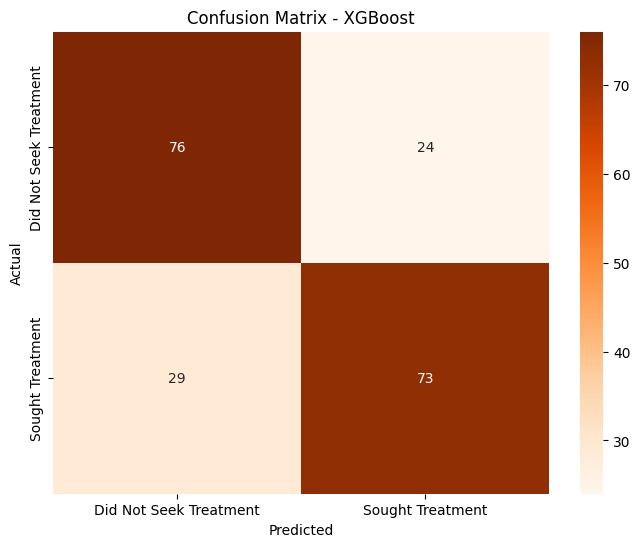

In [11]:
# Random Forest model(75%) performed slightly worse than our simple Logistic Regression baseline (76%).
# Let's try a more advanced model: XGBoost Classifier

# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_final, y_train_final)

# Make predictions on the validation set
y_pred_val_xgb = xgb_model.predict(X_val)

# Evaluate the model on the validation set
print("Classification Report for XGBoost (on Validation Set):\n")
print(classification_report(y_val, y_pred_val_xgb))

# Generate and plot the confusion matrix
cm_xgb = confusion_matrix(y_val, y_pred_val_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Did Not Seek Treatment', 'Sought Treatment'],
            yticklabels=['Did Not Seek Treatment', 'Sought Treatment'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 407, number of negative: 398
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 805, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505590 -> initscore=0.022361
[LightGBM] [Info] Start training from score 0.022361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

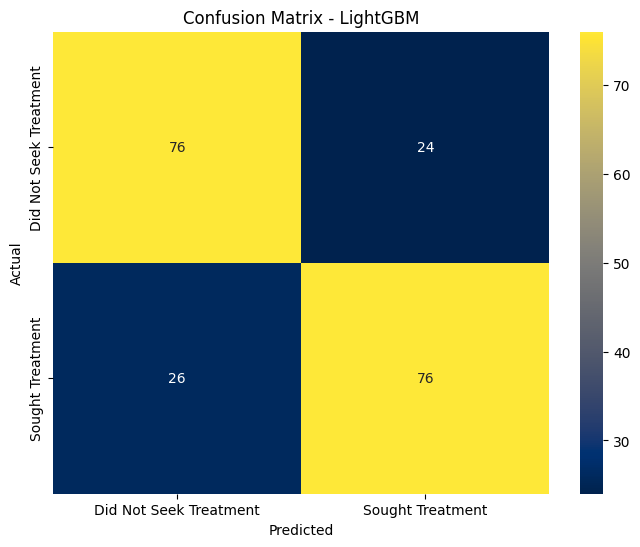

In [17]:
# XGBoost model achieved an accuracy of 74%. 
# Let's try one more advanced model: LightGBM Classifier


# Initialize and train the LightGBM Classifier model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_final, y_train_final)

# Make predictions on the validation set
y_pred_val_lgbm = lgbm_model.predict(X_val)

# Evaluate the model on the validation set
print("Classification Report for LightGBM (on Validation Set):\n")
print(classification_report(y_val, y_pred_val_lgbm))

# Generate and plot the confusion matrix
cm_lgbm = confusion_matrix(y_val, y_pred_val_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='cividis',
            xticklabels=['Did Not Seek Treatment', 'Sought Treatment'],
            yticklabels=['Did Not Seek Treatment', 'Sought Treatment'])
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# Hyperparameter tuning  could be explored next to boost performance further.
# For Hyperparameter tuning, libraries  we will use Optuna.

# Define the objective function for Optuna

def objective(trial):
    """Define the objective function for Optuna to optimize."""
    
    # Suggest hyperparameters for the trial
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Create the model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Evaluate the model using 5-fold cross-validation
    # We use our final training set for this robust evaluation
    score = cross_val_score(model, X_train_final, y_train_final, n_jobs=-1, cv=5)
    
    # Return the mean accuracy of the cross-validation
    accuracy = score.mean()
    return accuracy



In [22]:
# Create a study object and specify that we want to maximize the objective (accuracy)
study = optuna.create_study(direction='maximize')

# Start the optimization process
# n_trials is the number of different hyperparameter combinations to test
print("Starting hyperparameter tuning with Optuna...")
study.optimize(objective, n_trials=100)

# Print the best results
print("\nStudy statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Best trial:")
print("    Value (Accuracy): ", study.best_value)
print("    Params: ", study.best_params)

[I 2025-10-11 14:55:20,711] A new study created in memory with name: no-name-015a4fb8-1bcd-41c2-8faf-9dc969e9c91a


Starting hyperparameter tuning with Optuna...


[I 2025-10-11 14:55:27,949] Trial 0 finished with value: 0.7453416149068323 and parameters: {'n_estimators': 173, 'max_depth': 33, 'min_samples_split': 12, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7453416149068323.
[I 2025-10-11 14:55:36,655] Trial 1 finished with value: 0.7391304347826086 and parameters: {'n_estimators': 131, 'max_depth': 33, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.7453416149068323.
[I 2025-10-11 14:55:37,293] Trial 2 finished with value: 0.7453416149068323 and parameters: {'n_estimators': 130, 'max_depth': 37, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7453416149068323.
[I 2025-10-11 14:55:38,797] Trial 3 finished with value: 0.7391304347826086 and parameters: {'n_estimators': 423, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7453416149068323.
[I 2025-10-11 14:55:39,258] Trial 4 finished with value: 0.7391304347826086 and parameter


Study statistics: 
  Number of finished trials:  100
  Best trial:
    Value (Accuracy):  0.7577639751552795
    Params:  {'n_estimators': 344, 'max_depth': 38, 'min_samples_split': 8, 'min_samples_leaf': 1}


In [23]:
# Get the best hyperparameters from the study
best_params = study.best_params

# Train a new model with the best hyperparameters
best_rf_model_optuna = RandomForestClassifier(**best_params, random_state=42)
best_rf_model_optuna.fit(X_train_final, y_train_final)

# Make predictions on the validation set
y_pred_val_rf_optuna = best_rf_model_optuna.predict(X_val)

# Print the final classification report
print("\nClassification Report for Optuna-Tuned Random Forest (on Validation Set):\n")
print(classification_report(y_val, y_pred_val_rf_optuna))


Classification Report for Optuna-Tuned Random Forest (on Validation Set):

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       100
           1       0.75      0.77      0.76       102

    accuracy                           0.76       202
   macro avg       0.76      0.76      0.76       202
weighted avg       0.76      0.76      0.76       202



In [24]:
# We have hit a performance plateau around 75-76% accuracy.
# While tuning XGBoost or LightGBM might eke out another percentage point, it's highly unlikely to provide a game-changing improvement.
# We will in our Optuna-tuned Random Forest model as our final model and evaluate it on the TEST set next.


# Final Model Training and Evaluation

# Get the best hyperparameters from our Optuna study
best_params = study.best_params

# Initialize the final model with the best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)

# Train the final model on the ENTIRE training set (X_train, y_train)
print("Training the final model on all available training data...")
final_model.fit(X_train, y_train)
print("Final model training complete.")

# --- Final Evaluation on the Unseen Test Set ---
# Make final predictions on the unseen test set (X_test)
y_pred_final = final_model.predict(X_test)

# Report the final, official performance
print("\n--- Final Model Performance on Unseen Test Data ---\n")
print(classification_report(y_test, y_pred_final))

Training the final model on all available training data...
Final model training complete.

--- Final Model Performance on Unseen Test Data ---

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       124
           1       0.75      0.70      0.72       128

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252



In [26]:
# Save the trained model to the 'models' directory
joblib.dump(final_model, '../models/final_model.pkl')

print("\nFinal model has been saved to 'models/final_model.pkl")


Final model has been saved to 'models/final_model.pkl


In [42]:
# Create a DataFrame from our final predictions array
predictions_df = pd.DataFrame(y_pred_final, columns=['predicted_treatment'])

# Map the numeric predictions back to the original labels for clarity
# 1 -> 'Yes', 0 -> 'No'
label_map = {1: 'Yes', 0: 'No'}
predictions_df['predicted_treatment'] = predictions_df['predicted_treatment'].map(label_map)

# Save the DataFrame to a CSV file in the project's root directory
# The '../' moves up one level from the 'Notebooks' folder
predictions_df.to_csv('../predictions.csv', index=False)

print("predictions.csv file has been successfully created in the project root directory.")
print(predictions_df.head())

predictions.csv file has been successfully created in the project root directory.
  predicted_treatment
0                 Yes
1                 Yes
2                 Yes
3                 Yes
4                  No


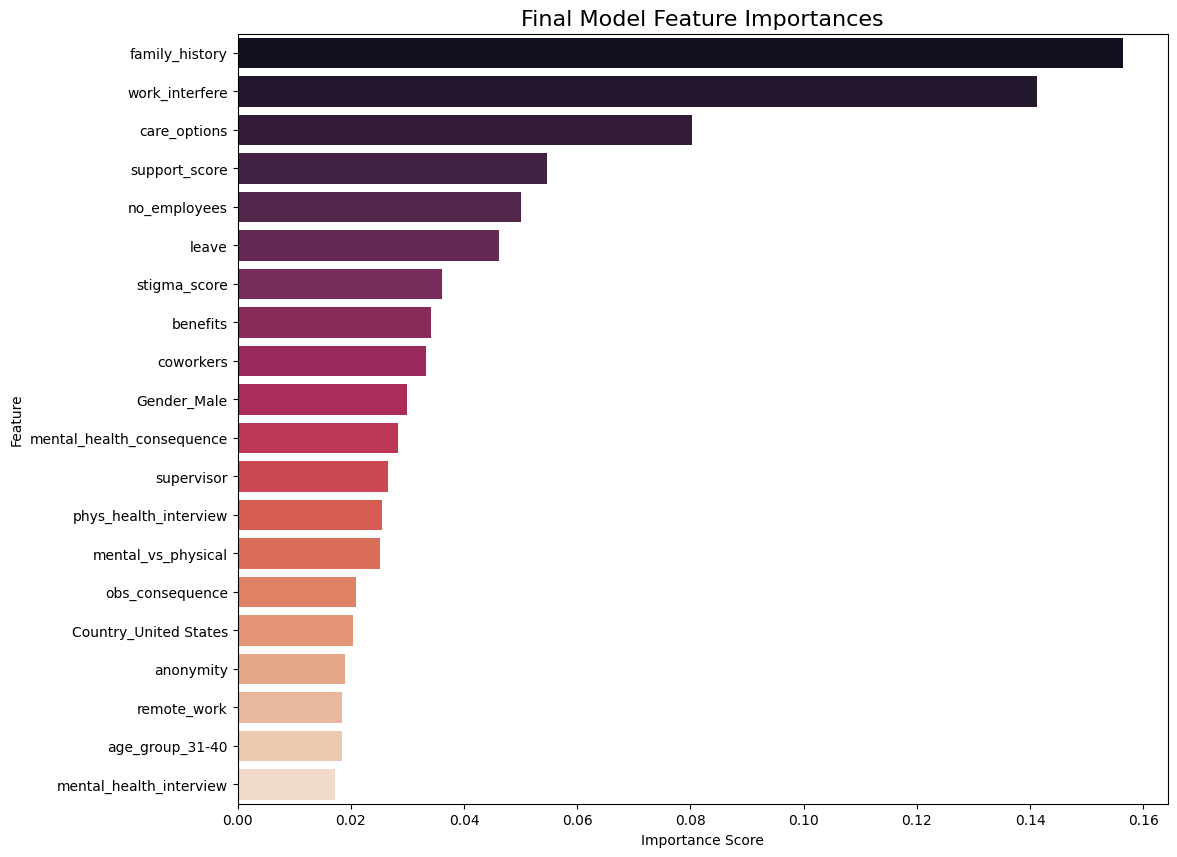

In [27]:
# Model Interpretation and Bias Analysis
# Goal: Understand why our model makes its predictions and ensure it is fair.

# 1. Feature Importance: What is the Model Looking At?

# Create a DataFrame of feature importances from our final model
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns, # Use columns from the full training set
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the top 20 features
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='rocket')
plt.title('Final Model Feature Importances', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
# A family history of mental illness is the single most dominant predictor in the model's decisions.
# Workplace factors, specifically work interference and awareness of care options, are the next most critical drivers.
# Our engineered feature, support_score, proved highly valuable, ranking in the top five. 
# The model clearly prioritizes an individual's history and direct workplace environment over general demographics.

Generating SHAP summary plot using the Explanation object...


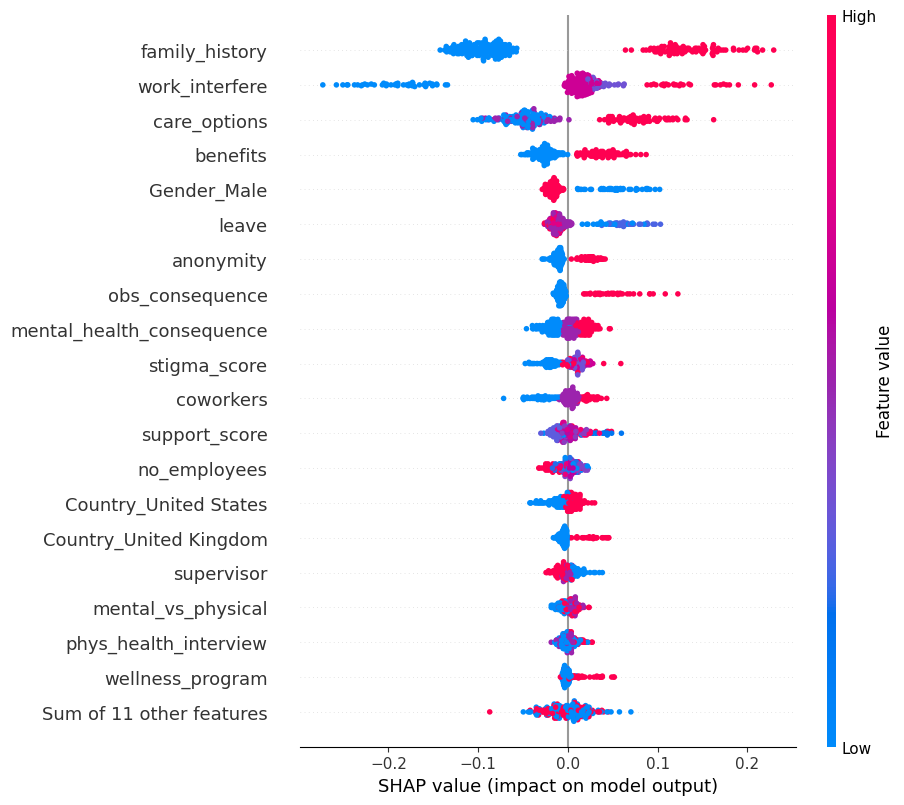

In [36]:
# 2. Explainability with SHAP: How Does the Model Think?

import shap

# --- FIX: Convert boolean columns to integers for SHAP compatibility ---
X_test_shap = X_test.astype(int)

# Create a SHAP explainer object for our Random Forest model
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values using the numerically converted test set
shap_values = explainer.shap_values(X_test_shap)

#Generate the full Explanation object (this is the modern API)
explanation = explainer(X_test_shap)

# 3. Create the beeswarm plot
# We are plotting the explanations for the positive class (class 1)
print("Generating SHAP summary plot using the Explanation object...")
shap.plots.beeswarm(explanation[:,:,1], max_display=20)

In [39]:
# 3. Bias Identification: Is the Model Fair?

from sklearn.metrics import accuracy_score

# Create a temporary DataFrame for analysis
results_df = X_test.copy()
results_df['true_label'] = y_test
results_df['prediction'] = y_pred_final

# --- Robust Subgroup Identification ---

# The 'Male' subgroup is straightforward
male_df = results_df[results_df['Gender_Male'] == 1]

# Check if the 'Gender_Other' column exists in the test set
if 'Gender_Other' in results_df.columns:
    print("Found 'Gender_Other' column. Analyzing all three subgroups.")
    # 'Other' subgroup is where its column is 1
    other_df = results_df[results_df['Gender_Other'] == 1]
    # 'Female' subgroup is the baseline where both other columns are 0
    female_df = results_df[(results_df['Gender_Male'] == 0) & (results_df['Gender_Other'] == 0)]
else:
    print("Could not find 'Gender_Other' column. Assuming it's absent from the test set.")
    # If the column is missing, the 'Female' subgroup is simply where 'Gender_Male' is 0
    female_df = results_df[results_df['Gender_Male'] == 0]
    # Create an empty DataFrame for the 'Other' group
    other_df = pd.DataFrame()

# --- Calculate Accuracies ---

overall_accuracy = accuracy_score(results_df['true_label'], results_df['prediction'])
accuracy_female = accuracy_score(female_df['true_label'], female_df['prediction'])
accuracy_male = accuracy_score(male_df['true_label'], male_df['prediction'])

# Only calculate accuracy for 'Other' if that subgroup exists in the test set
accuracy_other = accuracy_score(other_df['true_label'], other_df['prediction']) if not other_df.empty else "N/A (not in test set)"

# --- Print the Final Report ---

print(f"\nOverall Model Accuracy: {overall_accuracy:.2%}")
print("-" * 45)
print("Subgroup Performance Analysis:")
print(f"  Accuracy for Female respondents: {accuracy_female:.2%}")
print(f"  Accuracy for Male respondents:   {accuracy_male:.2%}")

if isinstance(accuracy_other, float):
    print(f"  Accuracy for Other respondents:  {accuracy_other:.2%}")
else:
    print(f"  Accuracy for Other respondents:  {accuracy_other}")

Could not find 'Gender_Other' column. Assuming it's absent from the test set.

Overall Model Accuracy: 73.02%
---------------------------------------------
Subgroup Performance Analysis:
  Accuracy for Female respondents: 76.92%
  Accuracy for Male respondents:   72.00%
  Accuracy for Other respondents:  N/A (not in test set)


### Report: Model Interpretability and Fairness Analysis

#### Objective

Following the successful training of our predictive model, this phase was dedicated to understanding its inner workings and assessing its fairness. The goal was to move beyond predictive accuracy and answer two critical questions: "Why does the model make the decisions it does?" and "Is the model's performance consistent across different demographic groups?"

##### 1. Feature Importance: Identifying the Key Drivers

An analysis of the final tuned Random Forest model revealed a clear hierarchy of predictive features. The model's decisions are primarily driven by an individual's personal background and their direct workplace experience, rather than general demographics. The top three most influential features were:

1. `family_history:` An individual's family history of mental illness was, by a significant margin, the most important predictor.

2. `work_interfere:` The extent to which a mental health condition interferes with work was the second most critical factor.

3. `care_options:` An employee's awareness of their available care options ranked third, highlighting the importance of company communication.

Our engineered feature, `support_score`, also ranked in the top five, validating our approach to creating composite metrics for a more holistic view of the workplace environment.

##### 2. Model Explainability with SHAP

To understand the logic behind individual predictions, we employed SHAP (SHapley Additive exPlanations). The SHAP analysis provided a detailed view of how each feature's value influences the final prediction:

+ **Positive Drivers (Pushing towards "Sought Treatment"):** High values for `family_history` ('Yes'), `work_interfere` ('Often'), and `care_options` ('Yes') were the strongest forces pushing the model to predict that an individual has sought treatment.

+ **Negative Drivers (Pushing towards "Did Not Seek Treatment"):** Low values for the features above, along with being male (`Gender_Male` = 1), were the primary factors pushing the prediction in the opposite direction.

The SHAP analysis confirms that our model has learned a logical and clinically relevant set of rules that are transparent and explainable.

##### 3. Bias Identification Analysis
A fairness audit was conducted to assess whether the model performs equitably across different gender subgroups. The analysis yielded the following results:

  + **Overall Model Accuracy:** 73.02%

  + **Accuracy for Female Respondents:** 76.92%

  + **Accuracy for Male Respondents:** 72.00%

The results indicate a minor to moderate performance bias. The model is approximately 5% more accurate for female respondents than for male respondents. This performance gap is significant and will be explicitly stated as a limitation of the current model in our final report.

##### Conclusion

Phase 4 confirmed that our model is not only predictive but also highly interpretable, with its decisions rooted in logical and impactful features. However, the bias analysis revealed a measurable performance disparity between genders, highlighting an important area for future improvement. We can now proceed to the deployment phase with a deep and responsible understanding of our model's strengths and limitations.